In [1]:
#!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

##Soda Tax and Sugar-Added Drink Consumption

Our dataset data_experiments_sodaTax, contains the following information:  

**ìd**: A unique number identifier for each of the 7,500 inhabitants of Pawnee  
**district**: The name of the district in which the corresponding unit lives  
**treatment**: A binary variable that signals whether the subject lived in a district where the tax was implemented  
**pre_tax**: The weekly sugar-added drink consumption in ounces before the tax was imposed  
**post_tax**: The weekly sugar-added drink consuption in ounces after the tax was imposed  



In [3]:
data = pd.read_csv('data_experiments_sodaTax.csv')
data = data.set_index('id')
data

,district,treatment,pre_tax,post_tax
id,,,,
1,Snake Lounge,0,1687.643767,1705.579059
2,Snake Lounge,0,427.295274,438.252636
3,Snake Lounge,0,566.469262,559.666399
4,Snake Lounge,0,606.929391,623.905706
5,Snake Lounge,0,572.640248,606.865426
...,...,...,...,...
7496,City Hall,1,428.703142,285.450249
7497,City Hall,1,558.340491,425.566153
7498,City Hall,1,385.474846,247.895842


Melt the dataframe = transform from wide to long.  
Columns for 'pre_tax' and 'post_tax' become values in 'period' column.

In [4]:
data1 = pd.melt(data, id_vars=['district', 'treatment'], value_vars=['pre_tax', 'post_tax'], var_name='period', value_name='soda_drank')
data1['after_tax'] = np.where(data1['period'] == 'pre_tax', 0, 1)
data1

,district,treatment,period,soda_drank,after_tax
0,Snake Lounge,0,pre_tax,1687.643767,0
1,Snake Lounge,0,pre_tax,427.295274,0
2,Snake Lounge,0,pre_tax,566.469262,0
3,Snake Lounge,0,pre_tax,606.929391,0
4,Snake Lounge,0,pre_tax,572.640248,0
...,...,...,...,...,...
14995,City Hall,1,post_tax,285.450249,1
14996,City Hall,1,post_tax,425.566153,1
14997,City Hall,1,post_tax,247.895842,1
14998,City Hall,1,post_tax,374.651967,1


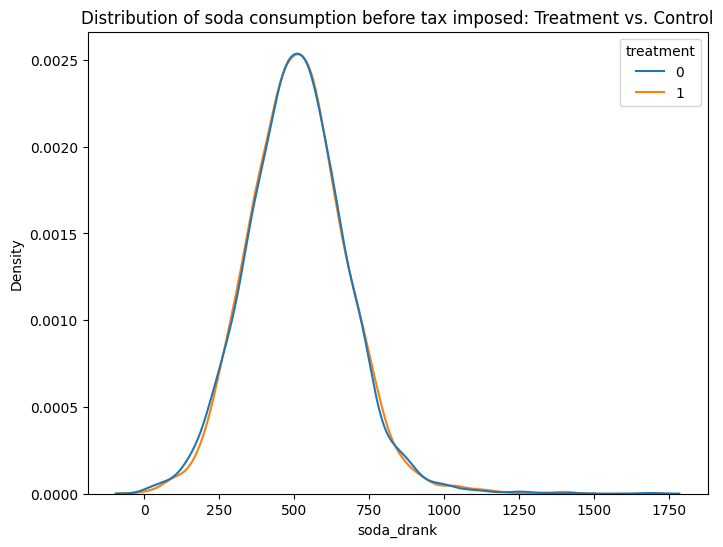

In [5]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data1[data1['period'] == 'pre_tax'], x="soda_drank", hue="treatment", fill=False, common_norm=False, alpha=1)
plt.title('Distribution of soda consumption before tax imposed: Treatment vs. Control')
plt.show()

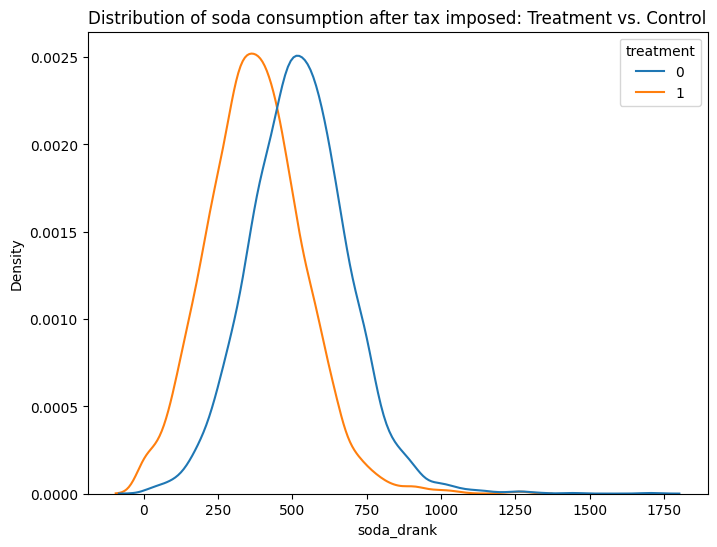

In [7]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data1[data1['period'] == 'post_tax'], x="soda_drank", hue="treatment", fill=False, common_norm=False, alpha=1)
plt.title('Distribution of soda consumption after tax imposed: Treatment vs. Control')
plt.show()

In [8]:
order = ['pre_tax', 'post_tax']
pd.crosstab(data1.treatment, data1.period, values = data1.soda_drank, aggfunc = 'mean')[order]

period,pre_tax,post_tax
treatment,,
0,508.305931,523.27264
1,511.132569,376.35482


In [12]:
model = smf.ols(formula ="soda_drank ~ treatment*after_tax", data=data1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             soda_drank   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     664.5
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:46:01   Log-Likelihood:                -97826.
No. Observations:               15000   AIC:                         1.957e+05
Df Residuals:                   14996   BIC:                         1.957e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             508.3059    

In [10]:
data2 = data1.copy()
data2['treatment_aftertax'] = data2['treatment'] * data2['after_tax']
data2

,district,treatment,period,soda_drank,after_tax,treatment_aftertax
0,Snake Lounge,0,pre_tax,1687.643767,0,0
1,Snake Lounge,0,pre_tax,427.295274,0,0
2,Snake Lounge,0,pre_tax,566.469262,0,0
3,Snake Lounge,0,pre_tax,606.929391,0,0
4,Snake Lounge,0,pre_tax,572.640248,0,0
...,...,...,...,...,...,...
14995,City Hall,1,post_tax,285.450249,1,1
14996,City Hall,1,post_tax,425.566153,1,1
14997,City Hall,1,post_tax,247.895842,1,1
14998,City Hall,1,post_tax,374.651967,1,1


In [12]:
model = smf.ols(formula ="soda_drank ~ treatment + after_tax + treatment_aftertax", data=data2).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             soda_drank   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     664.5
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:57:01   Log-Likelihood:                -97826.
No. Observations:               15000   AIC:                         1.957e+05
Df Residuals:                   14996   BIC:                         1.957e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            508.3059      2